In [80]:
#import all modules that will be used 
import pandas as pd
import numpy as np
import requests
import json 
import matplotlib.pyplot as plt
from pycaret.regression import *
pd.set_option('display.float_format', '{:,.2f}'.format)

In [81]:
#create an input variable for ticker - for this example, we will be using tesla (Ticker: TSLA)
x = input('Please input ticker symbol: ')
key = #insert API key here
ticker = x
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&interval=5min&outputsize=full&symbol={}&apikey={}'.format(ticker, key)
response = requests.get(url)
#the response received from the get request is a json file

Please input ticker symbol:  TSLA


In [67]:
#insert the json response into a dataframe minus the top 5 rows that are irrelevant
df = pd.DataFrame(response.json()).iloc[5:]
l = []
df1 = pd.DataFrame()
#after creating an empty list and dataframe, iterate over the Time Series Daily column which splits the values into different columns
for i in range(0, len(df['Time Series (Daily)'])):
    df2 = pd.DataFrame(pd.Series(df['Time Series (Daily)'].iloc[i]).astype(str).str.split(',')).T
    l.append(df2)
df1 = pd.concat(l)
#rejoin date column with the open, high, low, close, etc. columns
df = df.reset_index().join(df1.reset_index(), rsuffix = 'l')
#clean column names and drop unnecessary columns
df.columns = ['Date', 'Meta Data', 'Time Series', 'indexl', 'Open', 'High', 'Low', 'Close', 'Adjusted Close', 'Volume', 'Dividend Amt', 'Split Coefficient']
df.drop(['Meta Data', 'Time Series', 'indexl'], axis = 1, inplace = True)
#format date column into a date format 
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)
#now loop over each columns' values to eliminate the square brackets  
l = []
for i in range(len(df)):
    x = pd.Series(df['Open'].iloc[i]).str.replace('\\[\]', '', regex = True)
    l.append(x)
df['Open'] = list(pd.concat(l, ignore_index = True))
l = []
for i in range(len(df)):
    x = pd.Series(df['Close'].iloc[i]).str.replace('\\[\]', '', regex = True)
    l.append(x)
df['Close'] = list(pd.concat(l, ignore_index = True))
l = []
for i in range(len(df)):
    x = pd.Series(df['High'].iloc[i]).str.replace('\\[\]', '', regex = True)
    l.append(x)
df['High'] = list(pd.concat(l, ignore_index = True))
l = []
for i in range(len(df)):
    x = pd.Series(df['Low'].iloc[i]).str.replace('\\[\]', '', regex = True)
    l.append(x)
df['Low'] = list(pd.concat(l, ignore_index = True))
l = []
for i in range(len(df)):
    x = pd.Series(df['Adjusted Close'].iloc[i]).str.replace('\\[\]', '', regex = True)
    l.append(x)
df['Adjusted Close'] = list(pd.concat(l, ignore_index = True))
l = []
for i in range(len(df)):
    x = pd.Series(df['Volume'].iloc[i]).str.replace('\\[\]', '', regex = True)
    l.append(x)
df['Volume'] = list(pd.concat(l, ignore_index = True))
l = []
for i in range(len(df)):
    x = pd.Series(df['Dividend Amt'].iloc[i]).str.replace('\\[\]', '', regex = True)
    l.append(x)
df['Dividend Amt'] = list(pd.concat(l, ignore_index = True))
l = []
for i in range(len(df)):
    x = pd.Series(df['Split Coefficient'].iloc[i]).str.replace('\\[\]', '', regex = True)
    l.append(x)
df['Split Coefficient'] = list(pd.concat(l, ignore_index = True))
#now convert data type to float
df[['Open', 'High', 'Low', 'Close', 'Adjusted Close', 'Volume', 'Dividend Amt', 'Split Coefficient']] = df[['Open', 'High', 'Low', 'Close', 'Adjusted Close', 'Volume', 'Dividend Amt', 'Split Coefficient']].astype(float)
#now the data available through this API is cleaned and indexed by date making analysis much easier
df

,Open,High,Low,Close,Adjusted Close,Volume,Dividend Amt,Split Coefficient
Date,,,,,,,,
2021-07-01,683.92,687.99,672.80,677.92,677.92,"18,279,114.00",0.00,1.00
2021-06-30,679.77,692.81,678.14,679.70,679.70,"18,924,862.00",0.00,1.00
2021-06-29,684.65,687.51,675.89,680.76,680.76,"17,381,313.00",0.00,1.00
2021-06-28,671.64,694.70,670.32,688.72,688.72,"21,628,159.00",0.00,1.00
2021-06-25,689.58,693.81,668.70,671.87,671.87,"32,496,707.00",0.00,1.00
...,...,...,...,...,...,...,...,...
2010-07-06,20.00,20.00,15.83,16.11,3.22,"6,866,900.00",0.00,1.00
2010-07-02,23.00,23.10,18.71,19.20,3.84,"5,139,800.00",0.00,1.00
2010-07-01,25.00,25.92,20.27,21.96,4.39,"8,218,800.00",0.00,1.00


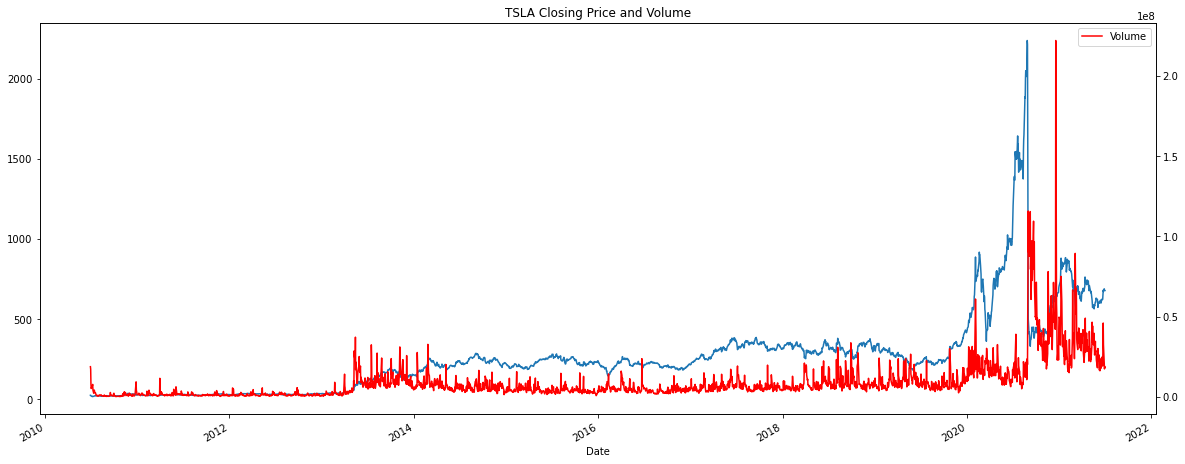

In [68]:
#preliminary exploratory visualization - plotting a time series of closing price and volume
#this visual initially suggests that price volatility is not directly correlated with trading volume
df['Close'].plot(kind = 'line', figsize = (20, 8))
plt.twinx()
df['Volume'].plot(kind = 'line', color = 'r')
plt.title(ticker+' Closing Price and Volume')
plt.legend()

In [70]:
#to obtain Income statements, use API function INCOME_STATEMENT
x = input('Please input ticker symbol: ')
key = #insert API key here
ticker = x
#now we want to obtain different info from the API - quarterly income statements - use API docs to get Income statements
url = 'https://www.alphavantage.co/query?function=INCOME_STATEMENT&symbol={}&apikey={}'.format(ticker, key)
response = requests.get(url)

Please input ticker symbol:  TSLA


In [71]:
#identify the different keys in the json response
k = response.json().keys()
#to get quarterly reports, use list comprehension and the 'quarterlyReports' key to return all values for this key
qr = [response.json()['quarterlyReports'] for key in k]
#list comprehension returns three duplicate lists, so only insert one, i.e. the first list, into a dataframe
dfqr = pd.DataFrame(qr[0])
pd.set_option('display.float_format', '{:,.2f}'.format)
#replace str None values with null i.e. numpy's NaN value
dfqr.replace('None', np.nan, inplace = True)
#convert values to float format
dfqr[['grossProfit', 'totalRevenue', 'costOfRevenue', 'costofGoodsAndServicesSold', 'operatingIncome', 'sellingGeneralAndAdministrative','researchAndDevelopment',
       'operatingExpenses', 'investmentIncomeNet', 'netInterestIncome',
       'interestIncome', 'interestExpense', 'nonInterestIncome',
       'otherNonOperatingIncome', 'depreciation',
       'depreciationAndAmortization', 'incomeBeforeTax', 'incomeTaxExpense',
       'interestAndDebtExpense', 'netIncomeFromContinuingOperations',
       'comprehensiveIncomeNetOfTax', 'ebit', 'ebitda', 'netIncome']] = dfqr[['grossProfit', 'totalRevenue', 'costOfRevenue', 'costofGoodsAndServicesSold', 'operatingIncome', 'sellingGeneralAndAdministrative', 'researchAndDevelopment',
       'operatingExpenses', 'investmentIncomeNet', 'netInterestIncome',
       'interestIncome', 'interestExpense', 'nonInterestIncome',
       'otherNonOperatingIncome', 'depreciation',
       'depreciationAndAmortization', 'incomeBeforeTax', 'incomeTaxExpense',
       'interestAndDebtExpense', 'netIncomeFromContinuingOperations',
       'comprehensiveIncomeNetOfTax', 'ebit', 'ebitda', 'netIncome']] .astype(float)
#now we have all of the reported figures for each quarterly income statement 
dfqr.set_index('fiscalDateEnding', inplace = True)

In [8]:
#exploratory data analysis - correlation between variables - which have the strongest relationship to profit or revenue
#correlation heatmaps are best done with seaborn
#as an example, Teslsa (TSLA) was the ticker
dfqr.corr()
#.corr() function shows that there is an 82% positive correlation between operating Income and depreciation

,grossProfit,totalRevenue,costOfRevenue,costofGoodsAndServicesSold,operatingIncome,sellingGeneralAndAdministrative,researchAndDevelopment,operatingExpenses,investmentIncomeNet,netInterestIncome,interestIncome,interestExpense,nonInterestIncome,otherNonOperatingIncome,depreciation,depreciationAndAmortization,incomeBeforeTax,incomeTaxExpense,interestAndDebtExpense,netIncomeFromContinuingOperations,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome
grossProfit,1.00,0.96,0.93,-0.55,0.91,0.75,0.67,0.70,0.46,-0.53,0.39,0.53,0.05,-0.06,0.86,0.45,0.87,0.73,0.56,0.66,0.84,0.90,0.94,0.84
totalRevenue,0.96,1.00,1.00,-0.51,0.80,0.83,0.73,0.80,0.58,-0.68,0.34,0.68,0.06,-0.01,0.89,0.49,0.73,0.66,0.69,0.65,0.71,0.78,0.85,0.70
costOfRevenue,0.93,1.00,1.00,-0.49,0.76,0.84,0.73,0.82,0.61,-0.71,0.32,0.71,0.06,0.00,0.89,0.49,0.68,0.63,0.72,0.64,0.66,0.74,0.82,0.65
costofGoodsAndServicesSold,-0.55,-0.51,-0.49,1.00,-0.61,-0.23,-0.11,-0.19,-0.36,0.35,0.17,-0.35,-0.36,-0.07,-0.18,-0.17,-0.61,-0.20,-0.29,-0.32,-0.60,-0.63,-0.60,-0.63
operatingIncome,0.91,0.80,0.76,-0.61,1.00,0.43,0.35,0.35,0.37,-0.34,0.48,0.34,0.01,-0.08,0.82,0.22,0.98,0.66,0.37,0.69,0.97,0.99,0.94,0.97
sellingGeneralAndAdministrative,0.75,0.83,0.84,-0.23,0.43,1.00,0.89,0.98,0.40,-0.63,0.10,0.63,0.08,-0.05,0.57,0.65,0.36,0.60,0.63,0.36,0.33,0.42,0.56,0.31
researchAndDevelopment,0.67,0.73,0.73,-0.11,0.35,0.89,1.00,0.92,0.35,-0.39,0.19,0.39,0.04,0.08,0.48,0.52,0.32,0.41,0.45,0.33,0.26,0.36,0.44,0.30
operatingExpenses,0.70,0.80,0.82,-0.19,0.35,0.98,0.92,1.00,0.40,-0.62,0.04,0.62,0.11,-0.00,0.47,0.65,0.28,0.53,0.63,0.31,0.25,0.35,0.50,0.24
investmentIncomeNet,0.46,0.58,0.61,-0.36,0.37,0.40,0.35,0.40,1.00,-0.59,0.63,0.59,-0.10,0.05,0.30,0.01,0.28,0.10,0.44,0.18,0.21,0.35,0.33,0.29
netInterestIncome,-0.53,-0.68,-0.71,0.35,-0.34,-0.63,-0.39,-0.62,-0.59,1.00,0.01,-1.00,-0.22,0.05,-0.18,-0.39,-0.21,-0.29,-0.95,-0.42,-0.27,-0.32,-0.44,-0.19


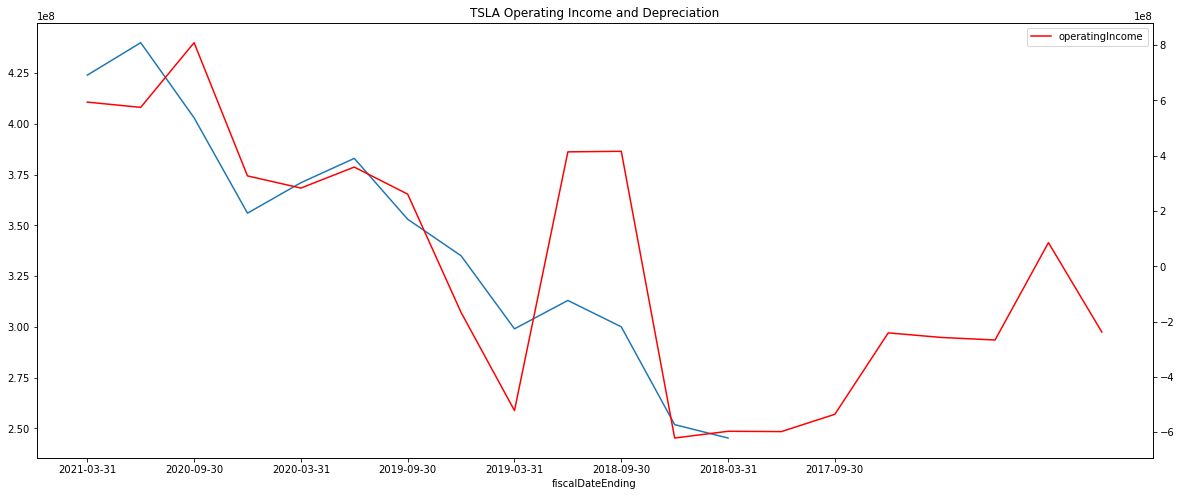

In [72]:
#plot the relationship between operating income and expenses
dfqr['depreciation'].plot(kind = 'line', figsize = (20, 8))
plt.twinx()
dfqr['operatingIncome'].plot(kind = 'line', color = 'r')
plt.title(ticker+' Operating Income and Depreciation')
plt.legend()

In [73]:
#it is interesting that a non-cash expense like depreciation can have such a relationship with income statement
#this indicates further study is required to understand this relationship
#i.e. is there a change in accounting policy in terms of recognizing/calculating depreciation that led to this relationship?
#or is an increase in depreciation expense indicative of asset accumulation which may indicate a positive return on assets?
#thankfully we can test the latter question with the Balance sheet API 

In [74]:
#uses balance sheet api function 
x = input('Please input ticker symbol: ')
key = #insert API key here
ticker = x
url = 'https://www.alphavantage.co/query?function=BALANCE_SHEET&symbol={}&apikey={}'.format(ticker, key)
response = requests.get(url)

Please input ticker symbol:  TSLA


In [75]:
ks = response.json().keys()
#to get quarterly reports, use list comprehension and the 'quarterlyReports' key to return all values for this key
bs = [response.json()['quarterlyReports'] for key in ks]
#list comprehension returns three duplicate lists, so only insert one, i.e. the first list, into a dataframe
dfbs = pd.DataFrame(bs[0])
pd.set_option('display.float_format', '{:,.2f}'.format)
#replace str None values with null i.e. numpy's NaN value
dfbs.replace('None', np.nan, inplace = True)
dfbs.set_index('fiscalDateEnding', inplace = True)
dfbs[['totalAssets', 'totalCurrentAssets',
       'cashAndCashEquivalentsAtCarryingValue', 'cashAndShortTermInvestments',
       'inventory', 'currentNetReceivables', 'totalNonCurrentAssets',
       'propertyPlantEquipment', 'accumulatedDepreciationAmortizationPPE',
       'intangibleAssets', 'intangibleAssetsExcludingGoodwill', 'goodwill',
       'investments', 'longTermInvestments', 'shortTermInvestments',
       'otherCurrentAssets', 'otherNonCurrrentAssets', 'totalLiabilities',
       'totalCurrentLiabilities', 'currentAccountsPayable', 'deferredRevenue',
       'currentDebt', 'shortTermDebt', 'totalNonCurrentLiabilities',
       'capitalLeaseObligations', 'longTermDebt', 'currentLongTermDebt',
       'longTermDebtNoncurrent', 'shortLongTermDebtTotal',
       'otherCurrentLiabilities', 'otherNonCurrentLiabilities',
       'totalShareholderEquity', 'treasuryStock', 'retainedEarnings',
       'commonStock', 'commonStockSharesOutstanding']] = dfbs[['totalAssets', 'totalCurrentAssets',
       'cashAndCashEquivalentsAtCarryingValue', 'cashAndShortTermInvestments',
       'inventory', 'currentNetReceivables', 'totalNonCurrentAssets',
       'propertyPlantEquipment', 'accumulatedDepreciationAmortizationPPE',
       'intangibleAssets', 'intangibleAssetsExcludingGoodwill', 'goodwill',
       'investments', 'longTermInvestments', 'shortTermInvestments',
       'otherCurrentAssets', 'otherNonCurrrentAssets', 'totalLiabilities',
       'totalCurrentLiabilities', 'currentAccountsPayable', 'deferredRevenue',
       'currentDebt', 'shortTermDebt', 'totalNonCurrentLiabilities',
       'capitalLeaseObligations', 'longTermDebt', 'currentLongTermDebt',
       'longTermDebtNoncurrent', 'shortLongTermDebtTotal',
       'otherCurrentLiabilities', 'otherNonCurrentLiabilities',
       'totalShareholderEquity', 'treasuryStock', 'retainedEarnings',
       'commonStock', 'commonStockSharesOutstanding']].astype(float)

In [78]:
dfbs.join(dfqr['depreciation'], on = 'fiscalDateEnding', how = 'left')[['totalAssets', 'totalCurrentAssets', 'inventory', 'totalNonCurrentAssets', 'totalLiabilities', 'depreciation']].corr()
#this gives us an indication as to the most likely variables that will be correlated with depreciation

,totalAssets,totalCurrentAssets,inventory,totalNonCurrentAssets,totalLiabilities,depreciation
totalAssets,1.00,0.93,0.85,0.93,0.90,0.90
totalCurrentAssets,0.93,1.00,0.76,0.78,0.71,0.91
inventory,0.85,0.76,1.00,0.89,0.89,0.77
totalNonCurrentAssets,0.93,0.78,0.89,1.00,0.97,0.90
totalLiabilities,0.90,0.71,0.89,0.97,1.00,0.97
depreciation,0.90,0.91,0.77,0.90,0.97,1.00


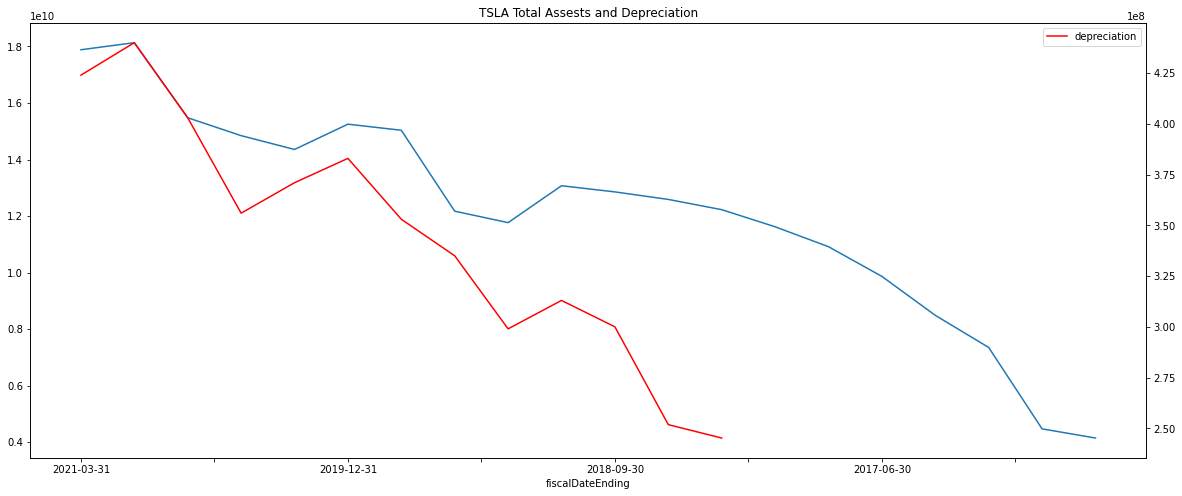

In [83]:
#plot the relationship between operating income and expenses
dfbs['totalNonCurrentAssets'].plot(kind = 'line', figsize = (20, 8))
plt.twinx()
dfqr['depreciation'].plot(kind = 'line', color = 'r')
plt.title(ticker+' Total Assests and Depreciation')
plt.legend()
#from this, we can establish that depreciation expense increases with the accumulation of non-current assest especially - this may indicate that there is a positive return on assets (RoA)
#therefore, a potential explanation for the positive relationship between net income and depreciation is a favourable return on assets, or at least on non-current assets